In [2]:
import warnings
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import lec6_graphs as afx

warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize']=(16,10)
plt.style.use('seaborn-whitegrid')

In [4]:
df = pd.read_csv('diabetes.csv').drop(columns='Unnamed: 0')

In [5]:
df.sample()

,class,glucose,insulin,sspg
115,Overt,280,1470,54


In [6]:
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.metrics import classification_report

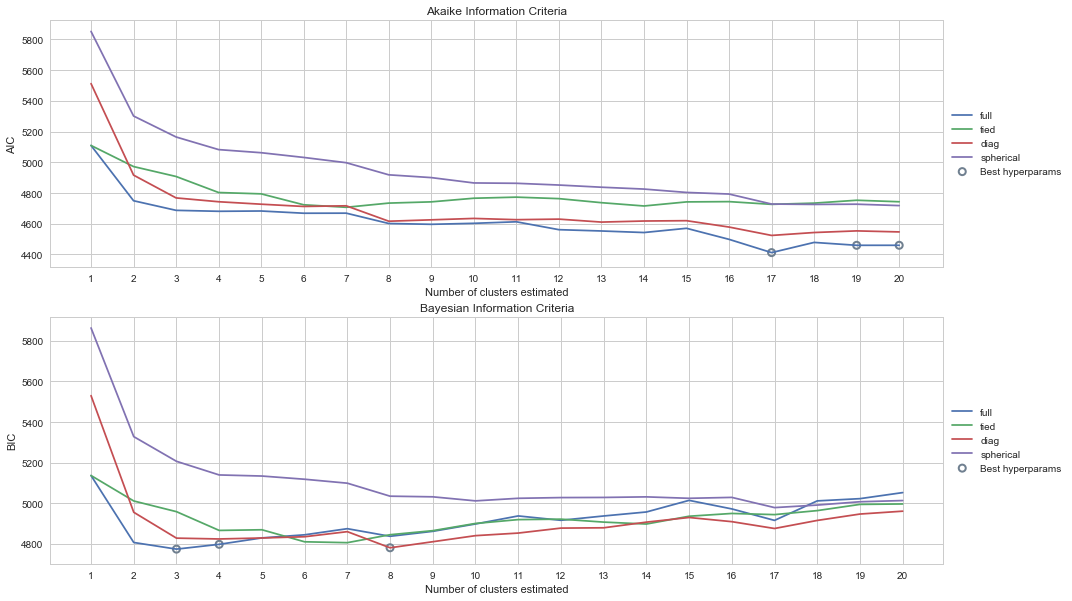

In [7]:
afx.gmm_information_criteria_report(df.loc[:,'glucose':'sspg'],k=np.arange(1,21))

Se opta por el modelo mas parsimonioso que es el de bayes

In [9]:
x_mat = df.loc[:,'glucose':'sspg']
X= StandardScaler().fit_transform(x_mat)
df['y']=LabelEncoder().fit_transform(df['class'])

In [10]:
X_train,X_test,y_train,y_test = train_test_split(X,df['y'],test_size=.33,random_state=11238)

In [11]:
gmm= GaussianMixture(n_components=3,
                     covariance_type='full',
                     random_state = 323
                    ).fit(X_train)

In [12]:
predict_classes_gmm = gmm.predict(X_test)

In [13]:
print(classification_report(y_test,predict_classes_gmm))

              precision    recall  f1-score   support

           0       1.00      0.15      0.27        13
           1       0.67      1.00      0.80        24
           2       1.00      0.91      0.95        11

    accuracy                           0.75        48
   macro avg       0.89      0.69      0.67        48
weighted avg       0.83      0.75      0.69        48



In [15]:
for i,n in enumerate(df['class'].unique()):
    print('El ponderador para la clase {}:{}'.format(i,gmm.weights_[i]))
    for j,k in enumerate(x_mat.columns):
        print('Media {}:{}'.format(k,gmm.means_[i][j]))
        print('Covarianza {}:{}'.format(k,gmm.covariances_[i][j]))
    print("\n",50*'=','\n')

El ponderador para la clase 0:0.07294484820645235
Media glucose:-0.31858978146637895
Covarianza glucose:[0.0484528  0.10223823 0.08173195]
Media insulin:-0.32399625945329585
Covarianza insulin:[0.10223823 0.27947309 0.30753721]
Media sspg:2.9350650096526913
Covarianza sspg:[0.08173195 0.30753721 0.91802227]


El ponderador para la clase 1:0.7211726396796098
Media glucose:-0.43320144960896445
Covarianza glucose:[0.03109801 0.04041905 0.00394483]
Media insulin:-0.4552442068222929
Covarianza insulin:[0.04041905 0.09294861 0.04763615]
Media sspg:-0.04144456388077901
Covarianza sspg:[0.00394483 0.04763615 0.32767927]


El ponderador para la clase 2:0.20588251211393807
Media glucose:1.4914604762538173
Covarianza glucose:[ 1.46756158  1.11264467 -0.31931487]
Media insulin:1.5581362700369932
Covarianza insulin:[ 1.11264467  0.91085877 -0.25075153]
Media sspg:-0.9011167014073534
Covarianza sspg:[-0.31931487 -0.25075153  0.13297251]




In [16]:
print("Densidades de cada clase inferida: ",gmm.weights_.round(3))

Densidades de cada clase inferida:  [0.073 0.721 0.206]


In [17]:
print("Suma de densidades: ",np.sum(gmm.weights_))

Suma de densidades:  1.0000000000000002


In [18]:
gmm.predict_proba(X).round(3)[60:70]

array([[0.   , 0.994, 0.006],
       [0.   , 0.999, 0.001],
       [0.   , 1.   , 0.   ],
       [0.   , 0.996, 0.004],
       [0.   , 0.946, 0.054],
       [0.   , 0.987, 0.013],
       [0.   , 0.995, 0.005],
       [0.   , 0.998, 0.002],
       [0.007, 0.993, 0.   ],
       [0.   , 0.964, 0.036]])

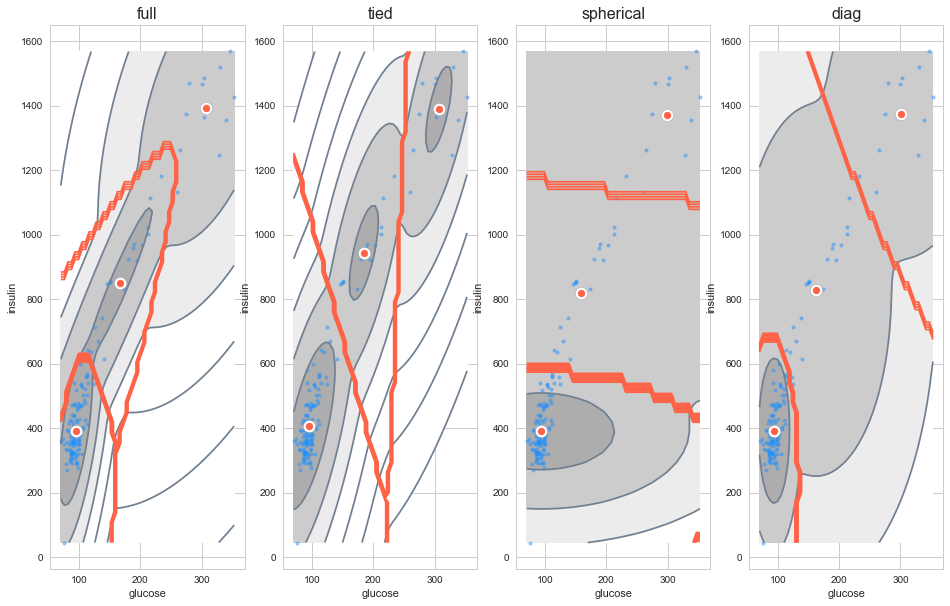

In [19]:
X =df.loc[:,['glucose','insulin']]
covar_candidate =['full','tied','spherical','diag']

for index, varname in enumerate(covar_candidate):
    plt.subplot(1,4,index+1)
    afx.plot_gaussian_ellipses(GaussianMixture(n_components=3,covariance_type=varname,
                                              random_state=323).fit(X),X=X)
    plt.tight_layout; plt.title(varname,fontsize=16)

In [20]:
for covar in covar_candidate:
    tmp_gmm = GaussianMixture(n_components=3,
                             covariance_type=covar,
                             random_state=323).fit(X_train)
    print(covar,'\n',classification_report(y_test,tmp_gmm.predict(X_test)))

full 
               precision    recall  f1-score   support

           0       1.00      0.15      0.27        13
           1       0.67      1.00      0.80        24
           2       1.00      0.91      0.95        11

    accuracy                           0.75        48
   macro avg       0.89      0.69      0.67        48
weighted avg       0.83      0.75      0.69        48

tied 
               precision    recall  f1-score   support

           0       1.00      0.23      0.38        13
           1       0.63      1.00      0.77        24
           2       1.00      0.64      0.78        11

    accuracy                           0.71        48
   macro avg       0.88      0.62      0.64        48
weighted avg       0.82      0.71      0.67        48

spherical 
               precision    recall  f1-score   support

           0       0.64      0.54      0.58        13
           1       0.78      0.88      0.82        24
           2       1.00      0.91      0.95      

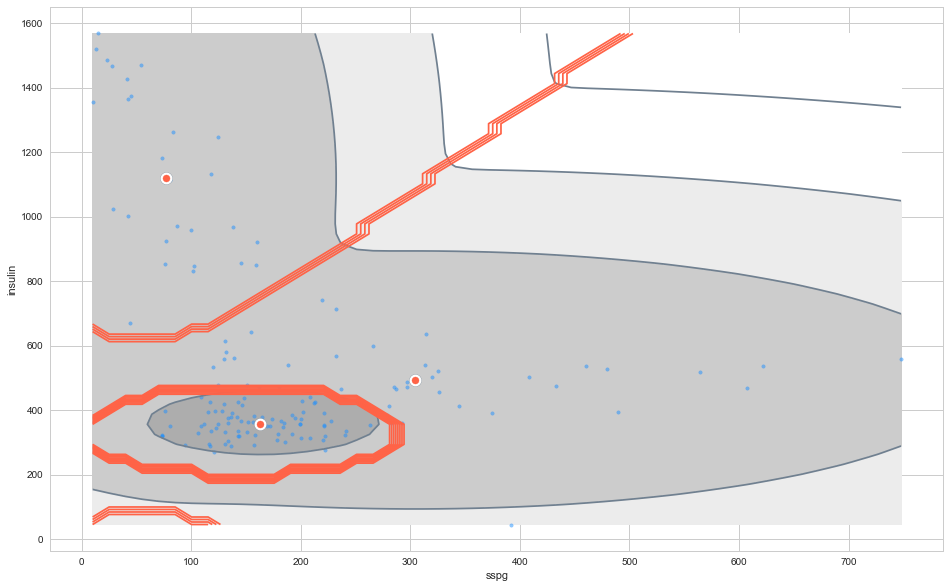

In [23]:
X = df.loc[:,['sspg','insulin']]
model = GaussianMixture(n_components=3,covariance_type='diag',random_state=323).fit(X)
afx.plot_gaussian_ellipses(model,X=X)

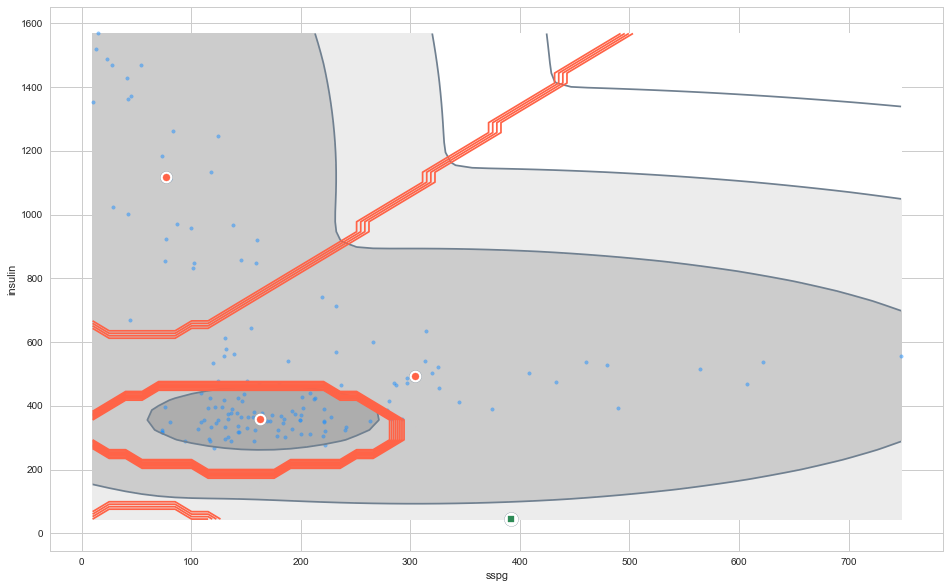

In [26]:
X = df.loc[:,['sspg','insulin']]
model = GaussianMixture(n_components=3,covariance_type='diag',random_state=323).fit(X)
afx.plot_gaussian_ellipses(model,X=X)
X = np.array(X)
densities = model.score_samples(X)
threshold = np.percentile(densities,.5)
anomalies = X[densities<threshold]
plt.scatter(anomalies[:,0],anomalies[:,1],edgecolors='slategray',facecolor='white',marker ='o',s=200)
plt.scatter(anomalies[:,0],anomalies[:,1],color='seagreen',marker='s',s=35)

In [27]:
anomalies

array([[392,  45]])

In [28]:
print(model.predict([anomalies[0]]))

[2]


In [29]:
df.query("sspg == {} and insulin == {}".format(anomalies[0][0],anomalies[0][1]))

,class,glucose,insulin,sspg,y
103,Chemical,75,45,392,0


Se observa que existe un dato que se considera una anomalia, esto debido a que segun el modelo predictivo este elemento deberia pertenecer a la clase '2' pero al realizar la consulta en el dataframe se observa que su verdadero valor pertenece a la clase 0